# Lecture 8.1: Decision and Regression Trees

**Decision Trees (DTs)** stand out in the landscape of supervised learning methods because of their dual capability for classification and regression tasks. A Decision Tree aims to distill data features into simple decision rules, which can be used to predict a target variable. The beauty of Decision Trees lies in their interpretability and simplicity—think of them as piecewise constant approximations, providing clear explanations for their predictions.

A Decision Tree is essentially a flowchart-like tree structure where an input at the root node undergoes a series of binary decisions, flowing down to the leaf nodes which contain the output values. This process mirrors human decision-making: start with a broad question and, based on the answer, ask subsequent, more specific questions until a conclusion is reached.

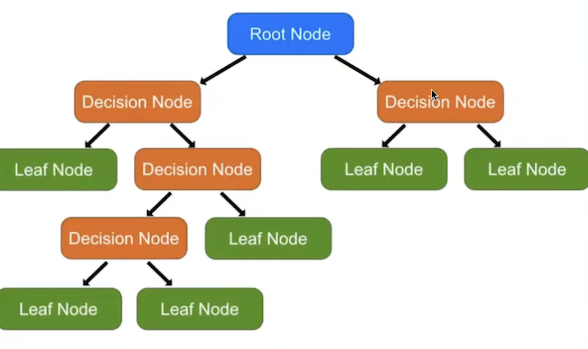

* The **Root node** represents the initial question about the data.
* **Decision nodes** further interrogate the data, leading to more specific nodes based on the answers.
* **Leaf nodes** deliver the final predictions after traversing the tree with a set of decision rules.

Building a Decision Tree involves two main stages: constructing the tree from training data and optimizing its branches for accurate predictions. This construction is not arbitrary. It's a meticulous process where the algorithm selects the most discriminative questions to ask, employing criteria like information gain or Gini impurity, which mathematically quantify the effectiveness of a split.

For instance, in classification, the tree is grown until the data is split into groups that are as homogeneous as possible. In regression, the aim is to divide the data in such a way that the means of the target variable in different leaves are as different as possible from each other, while still being close to the actual values within their respective segments.

Evaluating the performance of a Decision Tree typically involves a confusion matrix for classification tasks, giving a clear picture of the true positives, false positives, true negatives, and false negatives. In regression, metrics like the Mean Squared Error (MSE) provide a sense of how close the predicted continuous values are to the actual numbers.

The Decision Tree's intuitiveness extends to its visualization. Tools in `sklearn.tree` can graphically represent a tree, highlighting the decision paths and their corresponding outcomes. These visual cues empower users to understand the model's logic and rationale, often revealing insights into the feature relevance and decision-making process underlying the predictions.

In essence, Decision Trees offer a balance between simplicity and performance, making them a favored choice in many predictive modeling scenarios. Their clear logic and the structured approach to breaking down decisions render them not just as models but as informative guides through the complexity of data.


## Implementation

Let's fit a decision tree model on our data using all relevant predictors to predict salary

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

/Users/rahulprakash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
# Define features and the target variable
df = pd.read_csv('salary.csv')
X = df[["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
        "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
        "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"]].values
y = df["Salary"].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Replace NaN values with the mean of the column in X_train
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))

# Replace NaN values with the mean of y_train
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Ensure there are no infinite values by capping them to finite numbers
X_train = np.clip(X_train, a_min=-np.finfo(np.float32).max, a_max=np.finfo(np.float32).max)
y_train = np.clip(y_train, a_min=-np.finfo(np.float32).max, a_max=np.finfo(np.float32).max)

In [12]:
# Initialize the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
tree_regressor.fit(X_train, y_train)

# Check and replace NaN values in X_test
if np.isnan(X_test).any():
    X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

# Check and replace infinite values in X_test
if np.isinf(X_test).any():
    X_test = np.clip(X_test, a_min=-np.finfo(np.float32).max, a_max=np.finfo(np.float32).max)

In [13]:
# Make predictions
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 53513456375408.43
Root Mean Squared Error: 7315289.220216001


As we can see, our RMSE is pretty low but not as low as our Neural Network model, suggesting that our Decision Tree model fits our data less well than KNN. However, the difference in RMSE is not much and may vary across data samples.

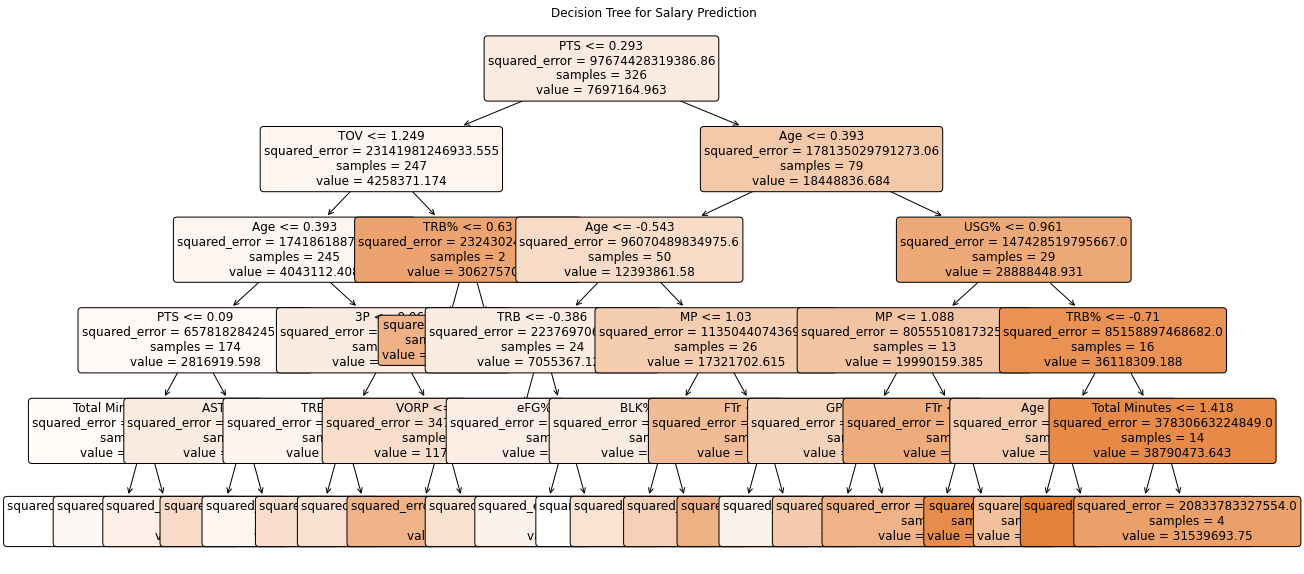

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(tree_regressor, 
          filled=True, 
          feature_names=["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
                         "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
                         "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"],
          class_names=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree for Salary Prediction')
plt.show()
